In [1]:
from modulos import ann
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
warnings.filterwarnings('ignore')

2025-08-12 21:03:35.133728: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1755047015.145675  845268 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1755047015.149305  845268 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1755047015.159523  845268 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755047015.159533  845268 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1755047015.159535  845268 computation_placer.cc:177] computation placer alr

In [2]:
df = pd.read_csv('/home/dsantos/ML HidroPrev/Cotas extraidas/dados_diarios_estacao_14990000.csv', sep=';')
df

,DataCompleta,Cota
0,1903-01-01,1914.0
1,1903-01-02,1921.0
2,1903-01-03,1924.0
3,1903-01-04,1926.0
4,1903-01-05,1929.0
...,...,...
44761,2025-07-27,2861.0
44762,2025-07-28,2857.0
44763,2025-07-29,2855.0
44764,2025-07-30,2851.0


In [3]:
df['DataCompleta'] = pd.to_datetime(df['DataCompleta'])
df.index = df['DataCompleta']
df.drop(columns=['DataCompleta'], inplace=True)
df

,Cota
DataCompleta,
1903-01-01,1914.0
1903-01-02,1921.0
1903-01-03,1924.0
1903-01-04,1926.0
1903-01-05,1929.0
...,...
2025-07-27,2861.0
2025-07-28,2857.0
2025-07-29,2855.0


In [4]:
df_mensal = df.resample('MS').mean()
df_mensal

,Cota
DataCompleta,
1903-01-01,1998.322581
1903-02-01,2139.678571
1903-03-01,2245.161290
1903-04-01,2437.966667
1903-05-01,2612.838710
...,...
2025-03-01,2508.580645
2025-04-01,2676.766667
2025-05-01,2816.096774


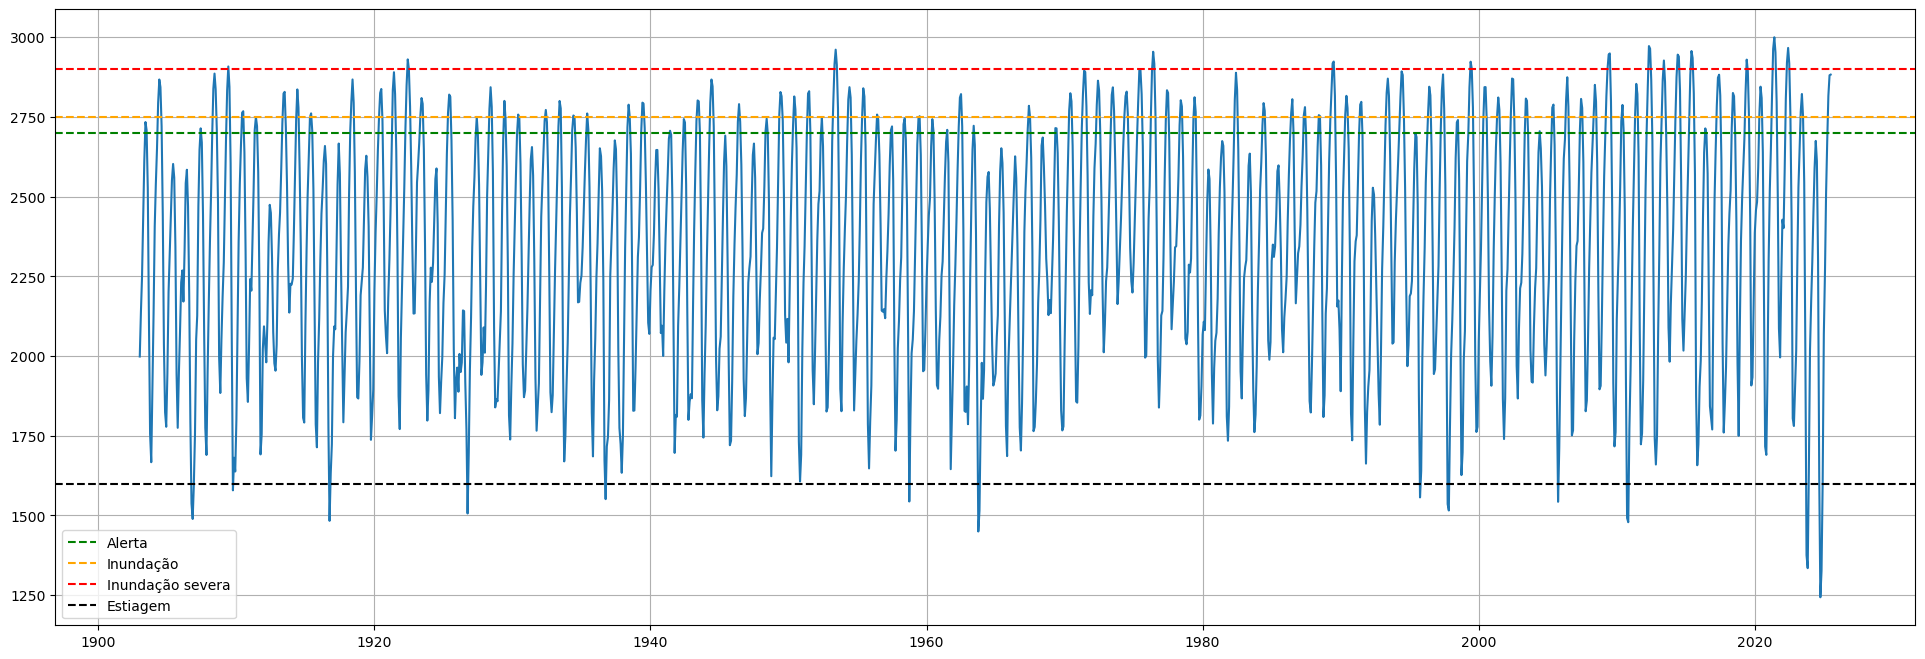

In [5]:
plt.figure(figsize=(24, 8))
plt.plot(df_mensal['Cota'])
plt.axhline(y=2700, color='green', linestyle='--', label='Alerta')
plt.axhline(y=2750, color='orange', linestyle='--', label='Inundação')
plt.axhline(y=2900, color='red', linestyle='--', label='Inundação severa')
plt.axhline(y=1600, color='black', linestyle='--', label='Estiagem')
plt.legend()
plt.grid()
plt.show()

In [6]:
el_nino_mensal3 = pd.read_csv('El Nino - indices/nino3_index.txt',
                             sep=r'\s+',
                             comment='#',
                             names=['Data', 'El Nino 3'])

el_nino_mensal34 = pd.read_csv('El Nino - indices/nino34_index.txt',
                             sep=r'\s+',
                             comment='#',
                             names=['Data', 'El Nino 3.4'])

In [7]:
el_nino_mensal3

,Data,El Nino 3
0,1981-09-01,-1.046740
1,1981-10-01,-1.516738
2,1981-11-01,-2.603116
3,1981-12-01,-2.529752
4,1982-01-01,-1.371151
...,...,...
522,2025-03-01,1.885315
523,2025-04-01,2.446499
524,2025-05-01,2.030067
525,2025-06-01,1.533929


In [8]:
el_nino_mensal34

,Data,El Nino 3.4
0,1981-09-01,-0.146604
1,1981-10-01,-0.201497
2,1981-11-01,-1.104974
3,1981-12-01,-1.587365
4,1982-01-01,-1.257948
...,...,...
522,2025-03-01,0.068410
523,2025-04-01,0.801271
524,2025-05-01,1.105611
525,2025-06-01,0.981585


In [9]:
el_nino_mensal3['Data'] = pd.to_datetime(el_nino_mensal3['Data'])
el_nino_mensal3.index = el_nino_mensal3['Data']
el_nino_mensal3.drop(columns=['Data'], inplace=True)

el_nino_mensal34['Data'] = pd.to_datetime(el_nino_mensal34['Data'])
el_nino_mensal34.index = el_nino_mensal34['Data']
el_nino_mensal34.drop(columns=['Data'], inplace=True)

In [10]:
el_nino_mensal3

,El Nino 3
Data,
1981-09-01,-1.046740
1981-10-01,-1.516738
1981-11-01,-2.603116
1981-12-01,-2.529752
1982-01-01,-1.371151
...,...
2025-03-01,1.885315
2025-04-01,2.446499
2025-05-01,2.030067


In [11]:
el_nino_mensal34

,El Nino 3.4
Data,
1981-09-01,-0.146604
1981-10-01,-0.201497
1981-11-01,-1.104974
1981-12-01,-1.587365
1982-01-01,-1.257948
...,...
2025-03-01,0.068410
2025-04-01,0.801271
2025-05-01,1.105611


In [12]:
df = el_nino_mensal3.copy()
df['El Nino 3.4'] = el_nino_mensal34['El Nino 3.4']
df['14990000'] = df_mensal['Cota']['1981-01-01':]
df

,El Nino 3,El Nino 3.4,14990000
Data,,,
1981-09-01,-1.046740,-0.146604,2137.400000
1981-10-01,-1.516738,-0.201497,1810.290323
1981-11-01,-2.603116,-1.104974,1734.133333
1981-12-01,-2.529752,-1.587365,1840.806452
1982-01-01,-1.371151,-1.257948,2186.645161
...,...,...,...
2025-03-01,1.885315,0.068410,2508.580645
2025-04-01,2.446499,0.801271,2676.766667
2025-05-01,2.030067,1.105611,2816.096774


In [13]:
tgt = '14990000'

decomp = seasonal_decompose(df['14990000'], model='additive', period=12)
deseason = df[tgt] - decomp.seasonal

for c in df.columns:
    if c == tgt:
        continue

    best_lag = None
    d_best_lag = None
    min_corr = np.inf
    d_min_corr = np.inf

    for i in range(0, 10):
        corr = df[tgt].corr(df[c].shift(i), method='spearman')
        d_corr = deseason.corr(df[c].shift(i), method='spearman')

        if corr < min_corr:
            min_corr = corr
            best_lag = i
        
        if d_corr < d_min_corr:
            d_min_corr = d_corr
            d_best_lag = i
    
    print(f"Coluna: {c}")
    print(f"Melhor lag = {best_lag}; Correlação = {min_corr:.4f}")
    print(f"D Melhor lag = {d_best_lag}; Correlação = {d_min_corr:.4f}\n")

Coluna: El Nino 3
Melhor lag = 6; Correlação = -0.8601
D Melhor lag = 8; Correlação = -0.1786

Coluna: El Nino 3.4
Melhor lag = 5; Correlação = -0.7098
D Melhor lag = 7; Correlação = -0.3014



### Teste ML 1

In [14]:
def create_multi_step_dataset(series, janela, n_steps):
    X, y = [], []
    for i in range(len(series) - janela - n_steps + 1):
        X.append(series[i:i+janela])
        y.append(series[i+janela:i+janela+n_steps])
    return np.array(X), np.array(y)

In [15]:
treino = df_mensal['1985-01-01':'2014-12-01']
teste = df_mensal['2015-01-01':]

janela = 3
steps = 1
X, y = create_multi_step_dataset(df_mensal['Cota']['1985-01-01':].values, janela, steps)

x_train1 = X[:treino.shape[0]-janela]
y_train1 = y[:treino.shape[0]-janela]

x_test1 = X[treino.shape[0]-janela:]
y_test1 = y[treino.shape[0]-janela:]

x_scale1 = MinMaxScaler()
x_train1 = x_scale1.fit_transform(x_train1)
x_test1 = x_scale1.transform(x_test1)

y_scale1 = MinMaxScaler()
y_train1 = y_scale1.fit_transform(y_train1)

In [16]:
lstm = ann.build_model_lstm(30, janela, steps)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

lstm.fit(x_train1, y_train1, epochs=250, callbacks=early_stop)

I0000 00:00:1755047017.447086  845268 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10151 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/250


I0000 00:00:1755047018.920888  845545 cuda_dnn.cc:529] Loaded cuDNN version 90300


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.4280 - mean_absolute_error: 0.6076
Epoch 2/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2858 - mean_absolute_error: 0.4843 
Epoch 3/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1671 - mean_absolute_error: 0.3535 
Epoch 4/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0959 - mean_absolute_error: 0.2689 
Epoch 5/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0618 - mean_absolute_error: 0.2207 
Epoch 6/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0488 - mean_absolute_error: 0.1845 
Epoch 7/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0520 - mean_absolute_error: 0.1836 
Epoch 8/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0505 - mean_absolute_error: 0.1886 
Epoch 9/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0491 - mean_absolute_error: 0.1890 
Epoch 10/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0479 - mean_absolute_error: 0.1876 
Epoch 11/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s

In [17]:
pred1 = lstm.predict(x_test1)
pred1_inv = y_scale1.inverse_transform(pred1)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


R² = 0.9196


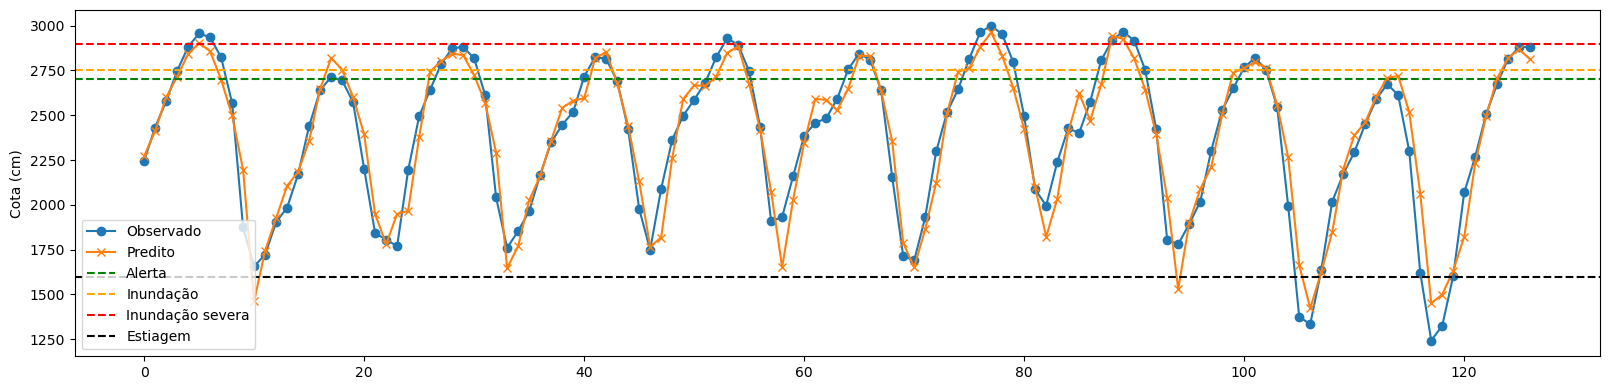

In [18]:
print(f"R² = {r2_score(y_test1, pred1_inv):.4f}")

plt.figure(figsize=(16, 4))
plt.plot(y_test1, marker='o', linestyle='-', label='Observado')
plt.plot(pred1_inv, marker='x', linestyle='-', label='Predito')
plt.axhline(y=2700, color='green', linestyle='--', label='Alerta')
plt.axhline(y=2750, color='orange', linestyle='--', label='Inundação')
plt.axhline(y=2900, color='red', linestyle='--', label='Inundação severa')
plt.axhline(y=1600, color='black', linestyle='--', label='Estiagem')
plt.legend(loc='lower left')
plt.tight_layout()
plt.ylabel('Cota (cm)')
plt.show()

### Teste ML 2

In [19]:
df_shifts = {
    '14990000': df['14990000'],
    'El Nino 3 - lag 6': df['El Nino 3'].shift(6),
    'El Nino 3.4 - lag 6': df['El Nino 3.4'].shift(6)
}

df_shifts = pd.DataFrame(df_shifts, index=df.index)
df_shifts

,14990000,El Nino 3 - lag 6,El Nino 3.4 - lag 6
Data,,,
1981-09-01,2137.400000,NaN,NaN
1981-10-01,1810.290323,NaN,NaN
1981-11-01,1734.133333,NaN,NaN
1981-12-01,1840.806452,NaN,NaN
1982-01-01,2186.645161,NaN,NaN
...,...,...,...
2025-03-01,2508.580645,-0.767842,-0.052544
2025-04-01,2676.766667,-1.414412,-0.293522
2025-05-01,2816.096774,-2.015337,-0.536451


In [20]:
treino = df_shifts['1985-01-01':'2014-12-01']
teste = df_shifts['2015-01-01':]

In [21]:
janela = 3
steps = 1

X_cota, y = create_multi_step_dataset(df_shifts['14990000']['1985-01-01':].values, janela, steps)

X = pd.DataFrame(X_cota)
X['nino3'] = df_shifts['El Nino 3 - lag 6']['1985-04-01':].values
X['nino34'] = df_shifts['El Nino 3.4 - lag 6']['1985-04-01':].values

In [22]:
x_scale2 = MinMaxScaler()
y_scale2 = MinMaxScaler()

x_train2 = X.values[:treino.shape[0]-janela]
y_train2 = y[:treino.shape[0]-janela]

x_test2 = X.values[treino.shape[0]-janela:]
y_test2 = y[treino.shape[0]-janela:]

x_train2 = x_scale2.fit_transform(x_train2)
x_test2 = x_scale2.transform(x_test2)

y_train2 = y_scale2.fit_transform(y_train2)

In [23]:
lstm2 = ann.build_model_lstm(150, x_train2.shape[1], steps, 'tanh')

lstm2.fit(x_train2, y_train2, epochs=250, callbacks=early_stop)

Epoch 1/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3220 - mean_absolute_error: 0.5055  
Epoch 2/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0716 - mean_absolute_error: 0.2151 
Epoch 3/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0672 - mean_absolute_error: 0.2200 
Epoch 4/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0610 - mean_absolute_error: 0.2049 
Epoch 5/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0593 - mean_absolute_error: 0.2042 
Epoch 6/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0568 - mean_absolute_error: 0.1995 
Epoch 7/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0572 - mean_absolute_error: 0.2010 
Epoch 8/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0560 - mean_absolute_error: 0.1972 
Epoch 9/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0552 - mean_absolute_error: 0.2001 
Epoch 10/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0537 - mean_absolute_error: 0.1896 
Epoch 11/250
12/12 ━━━━━━━━━

In [24]:
pred2 = lstm2.predict(x_test2)
pred2_inv = y_scale2.inverse_transform(pred2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


R² = 0.9196


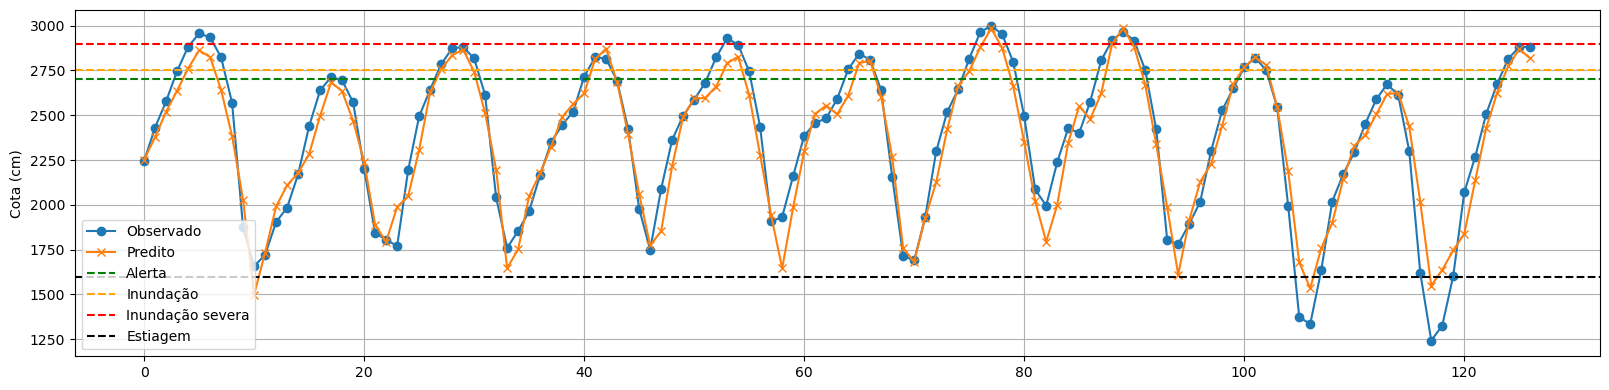

In [25]:
print(f"R² = {r2_score(y_test2, pred2_inv):.4f}")

plt.figure(figsize=(16, 4))
plt.plot(y_test2, marker='o', linestyle='-', label='Observado')
plt.plot(pred2_inv, marker='x', linestyle='-', label='Predito')
plt.axhline(y=2700, color='green', linestyle='--', label='Alerta')
plt.axhline(y=2750, color='orange', linestyle='--', label='Inundação')
plt.axhline(y=2900, color='red', linestyle='--', label='Inundação severa')
plt.axhline(y=1600, color='black', linestyle='--', label='Estiagem')
plt.legend(loc='lower left')
plt.tight_layout()
plt.ylabel('Cota (cm)')
plt.grid(True)
plt.show()

### Teste ML 3

In [26]:
X_a = X.drop(columns=['nino3', 'nino34'])
X_b = X.drop(columns=[0, 1, 2])

xa_scale = MinMaxScaler()
xb_scale = MinMaxScaler()
y_scale3 = MinMaxScaler()

X_train_a = X_a.values[:treino.shape[0]-janela]
X_train_b = X_b.values[:treino.shape[0]-janela]
y_train3 = y[:treino.shape[0]-janela:]

X_test_a = X_a.values[treino.shape[0]-janela:]
X_test_b = X_b.values[treino.shape[0]-janela:]
y_test3 = y[treino.shape[0]-janela:]

X_train_a = xa_scale.fit_transform(X_train_a)
X_test_a = xa_scale.transform(X_test_a)

X_train_b = xb_scale.fit_transform(X_train_b)
X_test_b = xb_scale.transform(X_test_b)

y_train3 = y_scale3.fit_transform(y_train3)

In [27]:
# LSTM
input_A = keras.layers.Input((janela, 1))
lstm_layer = keras.layers.LSTM(30)(input_A)

# MLP
input_B = keras.layers.Input(shape=(X_train_b.shape[1],))
dense1 = keras.layers.Dense(30)(input_B)
dense2 = keras.layers.Dense(30)(dense1)

# Concat
concat = keras.layers.Concatenate()([lstm_layer, dense2])

# Saída
output = keras.layers.Dense(1)(concat)

model = keras.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.MeanAbsoluteError()])

model.fit((X_train_a, X_train_b), y_train3, epochs=250, callbacks=early_stop)

Epoch 1/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3324 - mean_absolute_error: 0.5161  
Epoch 2/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1140 - mean_absolute_error: 0.2831 
Epoch 3/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1038 - mean_absolute_error: 0.2711 
Epoch 4/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0732 - mean_absolute_error: 0.2250 
Epoch 5/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0561 - mean_absolute_error: 0.1974 
Epoch 6/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0432 - mean_absolute_error: 0.1733 
Epoch 7/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0336 - mean_absolute_error: 0.1553 
Epoch 8/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0250 - mean_absolute_error: 0.1299 
Epoch 9/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0166 - mean_absolute_error: 0.1028 
Epoch 10/250
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0143 - mean_absolute_error: 0.0931 
Epoch 11/250
12/12 ━━━━━━━━━

In [28]:
pred3 = model.predict((X_test_a, X_test_b))
pred3_inv = y_scale3.inverse_transform(pred3)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x7b107cbb8900> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


R² = 0.9345


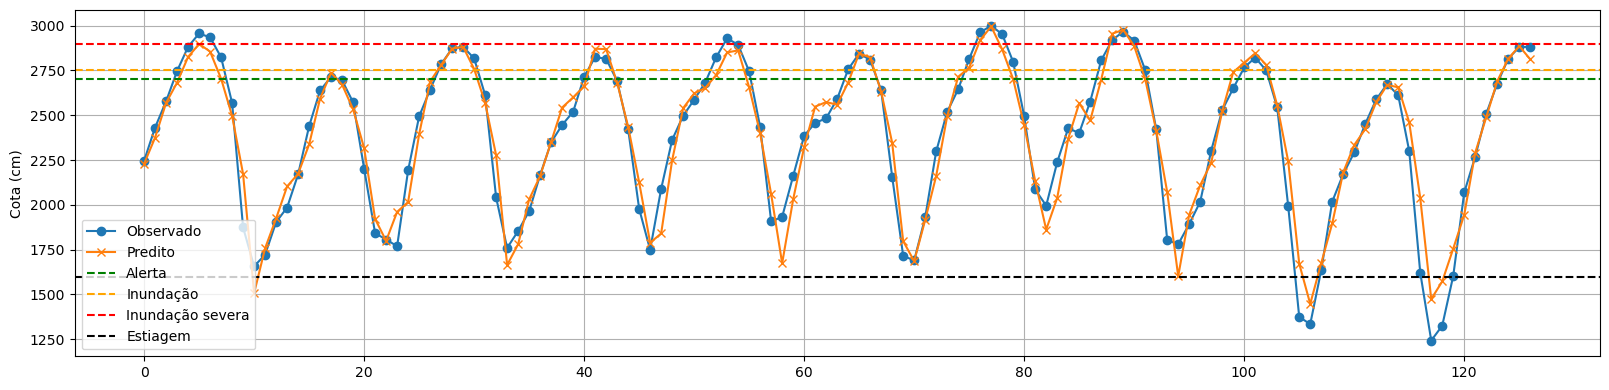

In [29]:
print(f"R² = {r2_score(y_test3, pred3_inv):.4f}")

plt.figure(figsize=(16, 4))
plt.plot(y_test3, marker='o', linestyle='-', label='Observado')
plt.plot(pred3_inv, marker='x', linestyle='-', label='Predito')
plt.axhline(y=2700, color='green', linestyle='--', label='Alerta')
plt.axhline(y=2750, color='orange', linestyle='--', label='Inundação')
plt.axhline(y=2900, color='red', linestyle='--', label='Inundação severa')
plt.axhline(y=1600, color='black', linestyle='--', label='Estiagem')
plt.legend(loc='lower left')
plt.tight_layout()
plt.ylabel('Cota (cm)')
plt.grid(True)
plt.show()